In [1]:
import random

class Person:
    def __init__(self):
        self.status = 'S'  # S: Susceptible, I: Infected, R: Recovered

    def interact(self, other):
        if self.status == 'I' and other.status == 'S':
            other.status = 'I' if random.random() < 0.05 else 'S'

    def recover(self):
        if self.status == 'I':
            self.status = 'R' if random.random() < 0.1 else 'I'

population = [Person() for i in range(100)]
patient_zero = random.choice(population)
patient_zero.status = 'I'

for day in range(10):
    for person in population:
        other = random.choice(population)
        person.interact(other)
        person.recover()
    infected_count = sum(1 for p in population if p.status == 'I')
    print(f"Day {day + 1}: {infected_count} infected")


Day 1: 1 infected
Day 2: 1 infected
Day 3: 1 infected
Day 4: 1 infected
Day 5: 1 infected
Day 6: 1 infected
Day 7: 1 infected
Day 8: 1 infected
Day 9: 1 infected
Day 10: 1 infected


In [2]:
import random

class Person:
    def __init__(self, contacts_per_day, infection_prob, recovery_rate):
        self.status = 'S'  # S: Susceptible, I: Infected, R: Recovered
        self.contacts_per_day = contacts_per_day
        self.infection_prob = infection_prob
        self.recovery_rate = recovery_rate

    def interact(self, others):
        if self.status == 'I':
            for _ in range(self.contacts_per_day):
                other = random.choice(others)
                if other.status == 'S':
                    other.status = 'I' if random.random() < self.infection_prob else 'S'

    def recover(self):
        if self.status == 'I':
            self.status = 'R' if random.random() < self.recovery_rate else 'I'

# 参数
contacts_per_day = 5  # 每天接触的人数
infection_prob = 0.05  # 感染概率
recovery_rate = 0.1   # 康复率
R0 = contacts_per_day * infection_prob

print(f"Basic Reproduction Number (R0) is: {R0}")

population = [Person(contacts_per_day, infection_prob, recovery_rate) for i in range(100)]
patient_zero = random.choice(population)
patient_zero.status = 'I'

for day in range(10):
    for person in population:
        person.interact(population)
        person.recover()
    infected_count = sum(1 for p in population if p.status == 'I')
    print(f"Day {day + 1}: {infected_count} infected")


Basic Reproduction Number (R0) is: 0.25
Day 1: 1 infected
Day 2: 1 infected
Day 3: 1 infected
Day 4: 2 infected
Day 5: 2 infected
Day 6: 1 infected
Day 7: 1 infected
Day 8: 1 infected
Day 9: 0 infected
Day 10: 0 infected


In [3]:
import random

class Person:
    def __init__(self, contacts_per_day, infection_prob, recovery_rate, mortality_rate):
        self.status = 'S'  # S: Susceptible, I: Infected, R: Recovered, D: Dead
        self.contacts_per_day = contacts_per_day
        self.infection_prob = infection_prob
        self.recovery_rate = recovery_rate
        self.mortality_rate = mortality_rate

    def interact(self, others):
        if self.status == 'I':
            for _ in range(self.contacts_per_day):
                other = random.choice(others)
                if other.status == 'S':
                    other.status = 'I' if random.random() < self.infection_prob else 'S'

    def recover_or_die(self):
        if self.status == 'I':
            if random.random() < self.recovery_rate:
                self.status = 'R'
            elif random.random() < self.mortality_rate:
                self.status = 'D'

# 参数
contacts_per_day = 5
infection_prob = 0.05
recovery_rate = 0.1
mortality_rate = 0.02

population = [Person(contacts_per_day, infection_prob, recovery_rate, mortality_rate) for i in range(100)]
patient_zero = random.choice(population)
patient_zero.status = 'I'

cumulative_infected = 1
cumulative_recovered = 0
cumulative_dead = 0

for day in range(10):
    daily_new_infected = sum(1 for p in population if p.status == 'I')
    daily_recovered = 0
    daily_dead = 0
    
    for person in population:
        status_before = person.status
        person.interact(population)
        person.recover_or_die()
        status_after = person.status
        
        if status_before == 'S' and status_after == 'I':
            cumulative_infected += 1
            daily_new_infected += 1
        elif status_before == 'I' and status_after == 'R':
            cumulative_recovered += 1
            daily_recovered += 1
        elif status_before == 'I' and status_after == 'D':
            cumulative_dead += 1
            daily_dead += 1

    print(f"Day {day + 1}: {daily_new_infected} new infections, {daily_recovered} recovered, {daily_dead} dead")
    print(f"Cumulative: {cumulative_infected} infected, {cumulative_recovered} recovered, {cumulative_dead} dead")
    print("-------------")


Day 1: 1 new infections, 0 recovered, 0 dead
Cumulative: 1 infected, 0 recovered, 0 dead
-------------
Day 2: 1 new infections, 0 recovered, 0 dead
Cumulative: 1 infected, 0 recovered, 0 dead
-------------
Day 3: 1 new infections, 1 recovered, 0 dead
Cumulative: 1 infected, 1 recovered, 0 dead
-------------
Day 4: 1 new infections, 1 recovered, 0 dead
Cumulative: 1 infected, 2 recovered, 0 dead
-------------
Day 5: 2 new infections, 0 recovered, 0 dead
Cumulative: 1 infected, 2 recovered, 0 dead
-------------
Day 6: 3 new infections, 2 recovered, 0 dead
Cumulative: 1 infected, 4 recovered, 0 dead
-------------
Day 7: 2 new infections, 0 recovered, 0 dead
Cumulative: 1 infected, 4 recovered, 0 dead
-------------
Day 8: 2 new infections, 0 recovered, 0 dead
Cumulative: 1 infected, 4 recovered, 0 dead
-------------
Day 9: 3 new infections, 0 recovered, 0 dead
Cumulative: 1 infected, 4 recovered, 0 dead
-------------
Day 10: 3 new infections, 0 recovered, 0 dead
Cumulative: 1 infected, 4 r

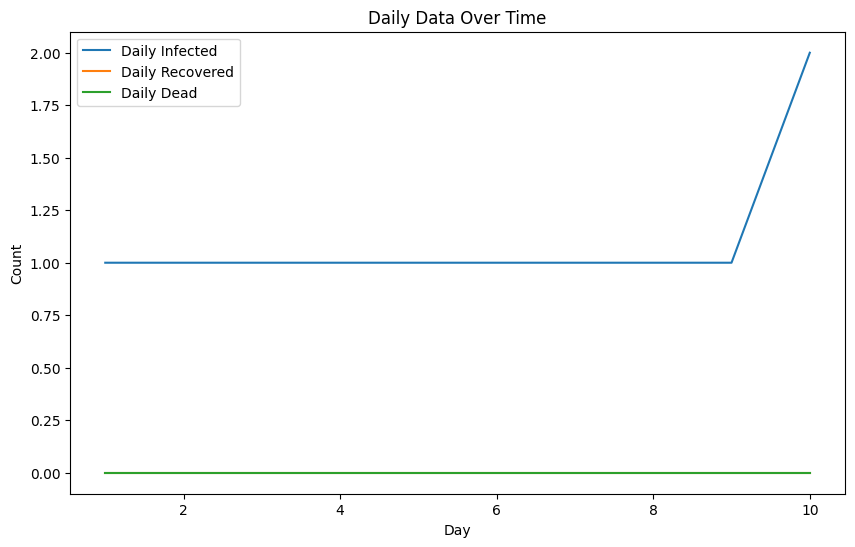

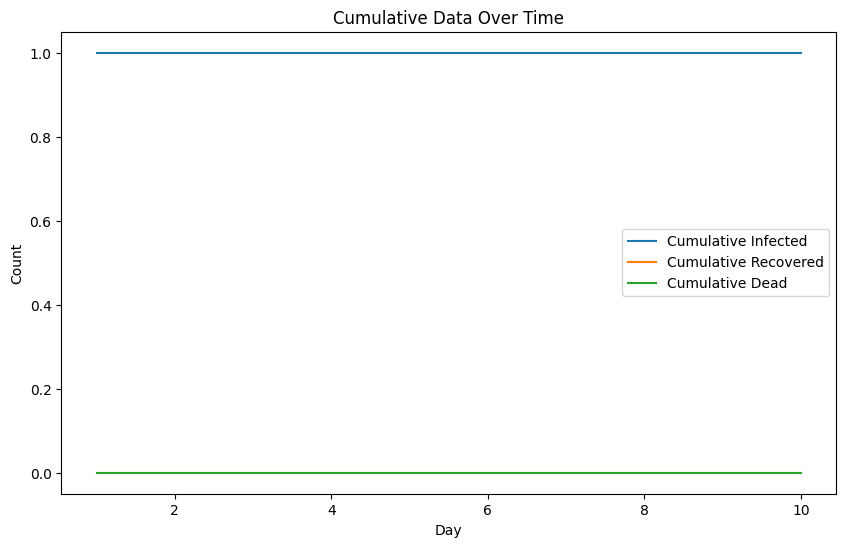

In [8]:
import random
import matplotlib.pyplot as plt

class Person:
    def __init__(self, contacts_per_day, infection_prob, recovery_rate, mortality_rate):
        self.status = 'S'  # S: Susceptible, I: Infected, R: Recovered, D: Dead
        self.contacts_per_day = contacts_per_day
        self.infection_prob = infection_prob
        self.recovery_rate = recovery_rate
        self.mortality_rate = mortality_rate

    def interact(self, others):
        if self.status == 'I':
            for _ in range(self.contacts_per_day):
                other = random.choice(others)
                if other.status == 'S':
                    other.status = 'I' if random.random() < self.infection_prob else 'S'

    def recover_or_die(self):
        if self.status == 'I':
            if random.random() < self.recovery_rate:
                self.status = 'R'
            elif random.random() < self.mortality_rate:
                self.status = 'D'

# 参数
contacts_per_day = 5
infection_prob = 0.05
recovery_rate = 0.1
mortality_rate = 0.02

population = [Person(contacts_per_day, infection_prob, recovery_rate, mortality_rate) for i in range(100)]
patient_zero = random.choice(population)
patient_zero.status = 'I'

cumulative_infected = 1
cumulative_recovered = 0
cumulative_dead = 0

daily_infected_data = []
daily_recovered_data = []
daily_dead_data = []

cumulative_infected_data = []
cumulative_recovered_data = []
cumulative_dead_data = []

for day in range(10):
    daily_new_infected = sum(1 for p in population if p.status == 'I')
    daily_recovered = 0
    daily_dead = 0
    
    for person in population:
        status_before = person.status
        person.interact(population)
        person.recover_or_die()
        status_after = person.status
        
        if status_before == 'S' and status_after == 'I':
            cumulative_infected += 1
            daily_new_infected += 1
        elif status_before == 'I' and status_after == 'R':
            cumulative_recovered += 1
            daily_recovered += 1
        elif status_before == 'I' and status_after == 'D':
            cumulative_dead += 1
            daily_dead += 1

    daily_infected_data.append(daily_new_infected)
    daily_recovered_data.append(daily_recovered)
    daily_dead_data.append(daily_dead)

    cumulative_infected_data.append(cumulative_infected)
    cumulative_recovered_data.append(cumulative_recovered)
    cumulative_dead_data.append(cumulative_dead)

# 画图
days = list(range(1, 11))

# 每日数据图
plt.figure(figsize=(10, 6))
plt.plot(days, daily_infected_data, label="Daily Infected")
plt.plot(days, daily_recovered_data, label="Daily Recovered")
plt.plot(days, daily_dead_data, label="Daily Dead")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend()
plt.title("Daily Data Over Time")
plt.show()

# 累计数据图
plt.figure(figsize=(10, 6))
plt.plot(days, cumulative_infected_data, label="Cumulative Infected")
plt.plot(days, cumulative_recovered_data, label="Cumulative Recovered")
plt.plot(days, cumulative_dead_data, label="Cumulative Dead")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend()
plt.title("Cumulative Data Over Time")
plt.show()

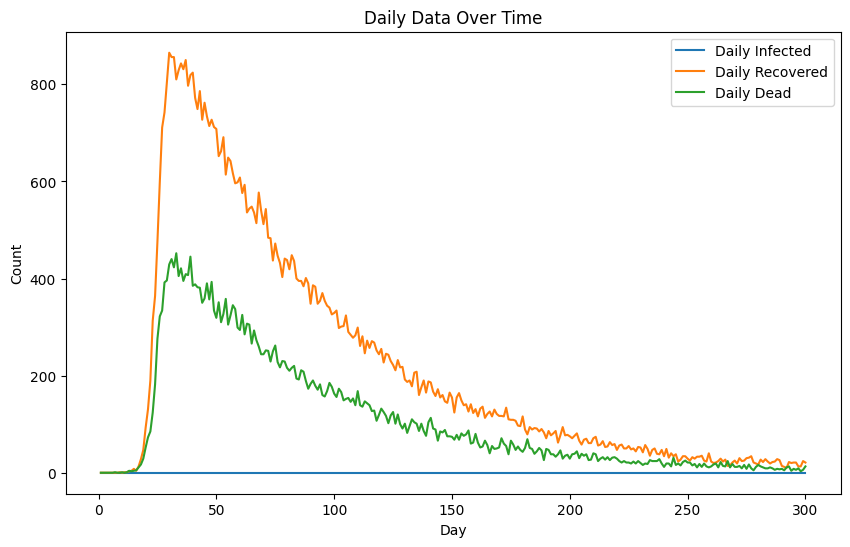

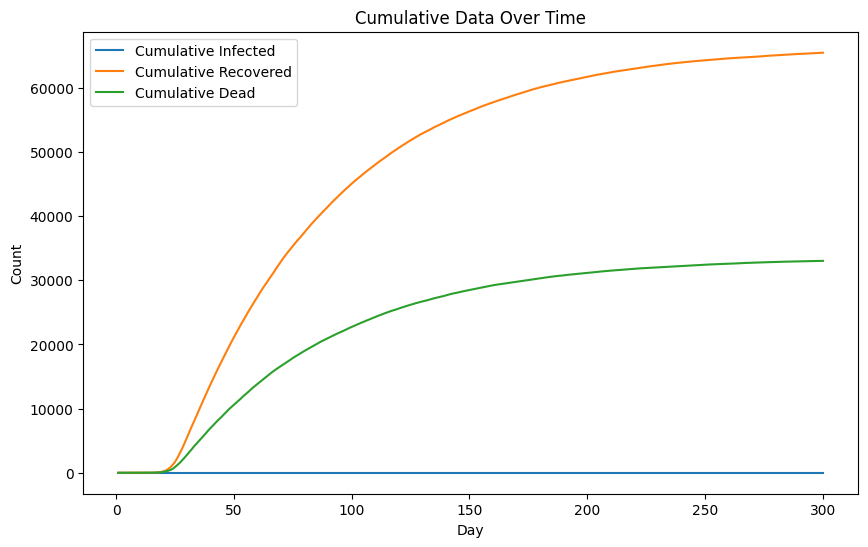

In [9]:
import random
import matplotlib.pyplot as plt

class Person:
    def __init__(self, contacts_per_day, infection_prob, recovery_rate, mortality_rate):
        self.status = 'S'  # Susceptible, Infected, Recovered, Dead: S, I, R, D
        self.contacts_per_day = contacts_per_day
        self.infection_prob = infection_prob
        self.recovery_rate = recovery_rate
        self.mortality_rate = mortality_rate

    def interact(self, others):
        if self.status != 'I':
            return

        contacts = random.sample(others, self.contacts_per_day)
        for contact in contacts:
            if contact.status == 'S' and random.random() < self.infection_prob:
                contact.status = 'I'

    def recover_or_die(self):
        if self.status == 'I':
            if random.random() < self.mortality_rate:
                self.status = 'D'
            elif random.random() < self.recovery_rate:
                self.status = 'R'

# 参数
contacts_per_day = 10
infection_prob = 0.05
recovery_rate = 0.01
mortality_rate = 0.005

population_size = 100000
population = [Person(contacts_per_day, infection_prob, recovery_rate, mortality_rate) for i in range(population_size)]
patient_zero = random.choice(population)
patient_zero.status = 'I'

sim_days = 300
daily_infected_data = [0] * sim_days
daily_recovered_data = [0] * sim_days
daily_dead_data = [0] * sim_days

for day in range(sim_days):
    for person in population:
        status_before = person.status
        person.interact(population)
        person.recover_or_die()
        status_after = person.status
        
        if status_before == 'S' and status_after == 'I':
            daily_infected_data[day] += 1
        elif status_before == 'I' and status_after == 'R':
            daily_recovered_data[day] += 1
        elif status_before == 'I' and status_after == 'D':
            daily_dead_data[day] += 1

cumulative_infected_data = [sum(daily_infected_data[:i+1]) for i in range(sim_days)]
cumulative_recovered_data = [sum(daily_recovered_data[:i+1]) for i in range(sim_days)]
cumulative_dead_data = [sum(daily_dead_data[:i+1]) for i in range(sim_days)]

# 画图
days = list(range(1, sim_days+1))

# 每日数据图
plt.figure(figsize=(10, 6))
plt.plot(days, daily_infected_data, label="Daily Infected")
plt.plot(days, daily_recovered_data, label="Daily Recovered")
plt.plot(days, daily_dead_data, label="Daily Dead")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend()
plt.title("Daily Data Over Time")
plt.show()

# 累计数据图
plt.figure(figsize=(10, 6))
plt.plot(days, cumulative_infected_data, label="Cumulative Infected")
plt.plot(days, cumulative_recovered_data, label="Cumulative Recovered")
plt.plot(days, cumulative_dead_data, label="Cumulative Dead")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend()
plt.title("Cumulative Data Over Time")
plt.show()
